In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import numpy as np
import pandas as pd

In [7]:
data_link = "/content/drive/MyDrive/DataSet/Churn_Modelling.csv"
df = pd.read_csv(data_link)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [14]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True).astype(int)

In [37]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [28]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
X_train.shape,
X_test.shape

(2000, 10)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [61]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [89]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8705 - loss: 0.3218 - val_accuracy: 0.8537 - val_loss: 0.3396
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8628 - loss: 0.3260 - val_accuracy: 0.8569 - val_loss: 0.3400
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8733 - loss: 0.3165 - val_accuracy: 0.8619 - val_loss: 0.3358
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8670 - loss: 0.3354 - val_accuracy: 0.8581 - val_loss: 0.3357
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8659 - loss: 0.3241 - val_accuracy: 0.8550 - val_loss: 0.3369
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3321 - val_accuracy: 0.8550 - val_loss: 0.3398
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3214 - val_accuracy: 0.8587 - val_loss: 0.3388
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3294 - val_accu

In [90]:
model.layers[0].get_weights()

[array([[ 7.85205290e-02,  7.51596689e-02,  1.07344083e-01,
          2.08290562e-01,  1.40881306e-02,  2.58242309e-01,
          1.19726649e-02,  4.04437818e-02,  2.21292540e-01,
          3.62174660e-02,  4.99106161e-02],
        [-7.27733254e-01,  7.81170607e-01, -1.00184345e+00,
          2.99001962e-01, -1.21068203e+00, -1.46193489e-01,
         -8.96379292e-01,  2.62438692e-02,  4.37474877e-01,
          2.73220956e-01,  1.53314948e-01],
        [-3.78727257e-01, -1.54910027e-04, -9.57111567e-02,
          1.08692739e-02,  7.91387707e-02, -3.63149107e-01,
          1.41818449e-01,  3.08119673e-02, -3.18699509e-01,
         -7.00108707e-02,  7.28743449e-02],
        [ 1.28822669e-01, -8.84740502e-02, -1.46386340e-01,
          4.63011637e-02,  4.64017719e-01,  1.66029811e-01,
         -6.66540325e-01, -1.00825417e+00,  6.72983646e-01,
          9.64487270e-02,  6.13333344e-01],
        [-2.48791650e-01,  3.33037823e-01,  1.53141975e-01,
         -1.59987316e-01, -2.65111417e-01,  

In [91]:
model.layers[1].get_weights()

[array([[-0.38161194, -0.4887425 ,  0.3507415 ,  0.30194688,  0.01836767,
         -0.21435389,  0.2258865 ,  0.47955   , -0.57370985,  0.04309808,
         -2.5152712 ],
        [-0.2081324 ,  0.12497907,  0.27909842,  0.7397762 ,  0.09753907,
          0.3396958 ,  0.02972462, -0.37279773,  0.28465587,  0.4427237 ,
          0.89379424],
        [-0.06278463, -0.73951364,  0.8984873 ,  0.7376577 ,  0.3735296 ,
          0.02586944, -0.09880197, -0.24267267, -0.72464836, -0.19307047,
         -0.183433  ],
        [ 0.47062337,  0.24766794, -0.07882324,  0.52479273, -0.7201081 ,
          0.4102503 , -0.32227734, -0.15558416,  0.00919791,  0.11043927,
         -0.20248081],
        [ 0.09804302,  0.5767469 , -0.39591327, -0.05782738,  0.592773  ,
          0.08643173, -0.13637601,  0.14029844, -0.8002602 ,  0.31453252,
         -0.2907646 ],
        [ 0.61997604,  0.48473263,  0.05372941,  0.30915272,  0.58585614,
         -0.53543025, -0.18351918, -0.79852784, -0.30860958, -0.0368945

In [92]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [70]:
y_log

array([[0.04012055],
       [0.06677906],
       [0.0924226 ],
       ...,
       [0.0238183 ],
       [0.0472688 ],
       [0.38225004]], dtype=float32)

In [93]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8665

In [95]:
import matplotlib.pyplot as plt

In [96]:
history.history

{'accuracy': [0.8685937523841858,
  0.866406261920929,
  0.8675000071525574,
  0.8678125143051147,
  0.8671875,
  0.8684375286102295,
  0.8671875,
  0.8676562309265137,
  0.8676562309265137,
  0.8673437237739563,
  0.8692187666893005,
  0.8690624833106995,
  0.8678125143051147,
  0.8693749904632568,
  0.8685937523841858,
  0.8693749904632568,
  0.8692187666893005,
  0.8695312738418579,
  0.8681250214576721,
  0.8682812452316284,
  0.8684375286102295,
  0.8684375286102295,
  0.8690624833106995,
  0.8656250238418579,
  0.8670312762260437,
  0.8712499737739563,
  0.8704687356948853,
  0.8695312738418579,
  0.8698437213897705,
  0.8667187690734863,
  0.8685937523841858,
  0.8698437213897705,
  0.8698437213897705,
  0.8690624833106995,
  0.8692187666893005,
  0.8692187666893005,
  0.8689062595367432,
  0.8701562285423279,
  0.8696874976158142,
  0.8681250214576721,
  0.8689062595367432,
  0.8695312738418579,
  0.8684375286102295,
  0.867968738079071,
  0.8687499761581421,
  0.86828124523162

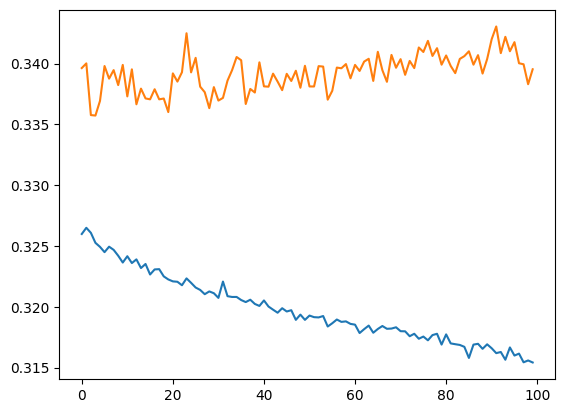

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

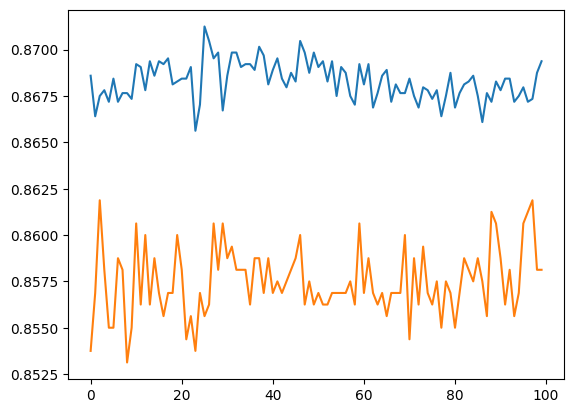

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])